In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
data_location = 'location_dataset/zip_code_with_location_raw.csv'
US_states_loc = 'location_dataset/state_codes.csv'  #only US states not territories
US_timezones = 'location_dataset/us_timezones.csv'


List of US states + DC for filtering the dataset

In [44]:
df_USstates = pd.read_csv(US_states_loc)
USstates_list = list(df_USstates['Code'])

TimeZones of different Counties in US

In [45]:
df_UStimezones = pd.read_csv(US_timezones)

In [46]:
US_timezones_dict = {}
for i in range(0, len(df_UStimezones)):
    US_timezones_dict[df_UStimezones['CountyTimeZone'][i]] = df_UStimezones['TimeZone'][i]

In [47]:
US_timezones_dict

{'America/New_York': 'EDT',
 'America/Detroit': 'EDT',
 'America/Kentucky/Louisville': 'EDT',
 'America/Kentucky/Monticello': 'EDT',
 'America/Indiana/Indianapolis': 'EDT',
 'America/Indiana/Vincennes': 'EDT',
 'America/Indiana/Winamac': 'EDT',
 'America/Indiana/Marengo': 'EDT',
 'America/Indiana/Petersburg': 'EDT',
 'America/Indiana/Vevay': 'EDT',
 'America/Chicago': 'CDT',
 'America/Indiana/Tell_City': 'CDT',
 'America/Indiana/Knox': 'CDT',
 'America/Menominee': 'CDT',
 'America/North_Dakota/Center': 'CDT',
 'America/North_Dakota/New_Salem': 'CDT',
 'America/North_Dakota/Beulah': 'CDT',
 'America/Denver': 'MDT',
 'America/Boise': 'MDT',
 'America/Phoenix': 'MDT',
 'America/Los_Angeles': 'PDT',
 'America/Anchorage': 'AKDT',
 'America/Juneau': 'AKDT',
 'America/Sitka': 'AKDT',
 'America/Metlakatla': 'AKDT',
 'America/Yakutat': 'AKDT',
 'America/Nome': 'AKDT',
 'America/Adak': 'AKDT',
 'Pacific/Honolulu': 'HDT'}

In [48]:
df = pd.read_csv(data_location)

Taking only required columns to df2

In [49]:
df2 = df[['zip', 'type', 'primary_city', 'acceptable_cities',
       'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes','latitude', 'longitude',]]

Filtering only US states and excluding the territories

In [50]:
df3 = df2[df2['state'].apply(lambda x: x in USstates_list)]

In [52]:
#replacing Napakiak with America/Adak because it is the only county with the different timezone
df3['timezone'] = df3['timezone'].replace({'Napakiak': 'America/Adak'})

/tmp/ipykernel_13532/1465314090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['timezone'] = df3['timezone'].replace({'Napakiak': 'America/Adak'})


In [61]:
df3['New TimeZone'] = df3['timezone'].apply(lambda x: US_timezones_dict[x])

/tmp/ipykernel_13532/3606501532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['New TimeZone'] = df3['timezone'].apply(lambda x: US_timezones_dict[x])


In [65]:
sns.heat

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,New TimeZone


<Axes: >

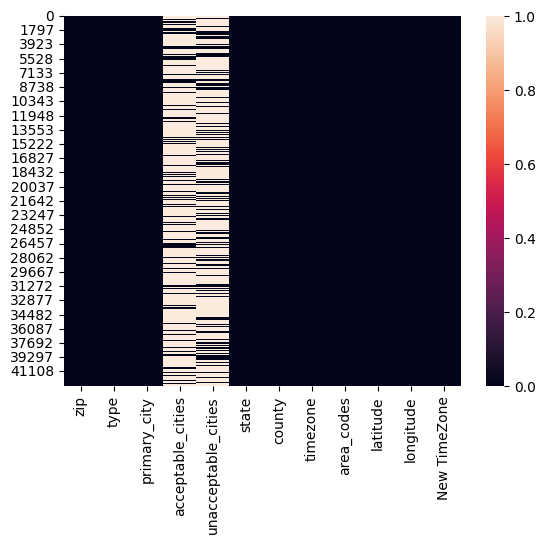

In [75]:
sns.heatmap(df3.isna())

In [96]:
final_dataset = df3[['zip', 'type', 'primary_city', 'state', 'county', 'New TimeZone', 'timezone', 'area_codes',
       'latitude', 'longitude']].rename(columns={'timezone': 'place_timezone',
                                                                 'New TimeZone': 'standard_timezone'})

In [94]:
final_dataset

,zip,type,primary_city,state,county,standard_timezone,place_timezone,area_codes,latitude,longitude
0,501,UNIQUE,Holtsville,NY,Suffolk County,EDT,America/New_York,631,40.81,-73.04
1,544,UNIQUE,Holtsville,NY,Suffolk County,EDT,America/New_York,631,40.81,-73.04
194,1001,STANDARD,Agawam,MA,Hampden County,EDT,America/New_York,"413, 860, 959",42.06,-72.61
195,1002,STANDARD,Amherst,MA,Hampshire County,EDT,America/New_York,"351, 413, 978",42.37,-72.52
196,1003,STANDARD,Amherst,MA,Hampshire County,EDT,America/New_York,413,42.39,-72.52
...,...,...,...,...,...,...,...,...,...,...
42730,99926,PO BOX,Metlakatla,AK,Prince of Wales-Hyder Census Area,AKDT,America/Metlakatla,907,55.14,-131.49
42731,99927,PO BOX,Point Baker,AK,Prince of Wales-Hyder Census Area,AKDT,America/Sitka,907,56.33,-133.61
42732,99928,PO BOX,Ward Cove,AK,Ketchikan Gateway Borough,AKDT,America/Sitka,907,55.45,-131.79
42733,99929,PO BOX,Wrangell,AK,Wrangell City and Borough,AKDT,America/Sitka,"236, 250, 672, 778, 907",56.41,-131.61


In [97]:
final_dataset.to_csv('Location_Dataset.csv', index=False)

In [125]:
len(final_dataset['area_codes'].unique())

1356

In [117]:
final_dataset.isna().sum()

zip                   0
type                  0
primary_city          0
state                 0
county               70
standard_timezone     0
place_timezone        0
area_codes           17
latitude              0
longitude             0
dtype: int64

<Axes: >

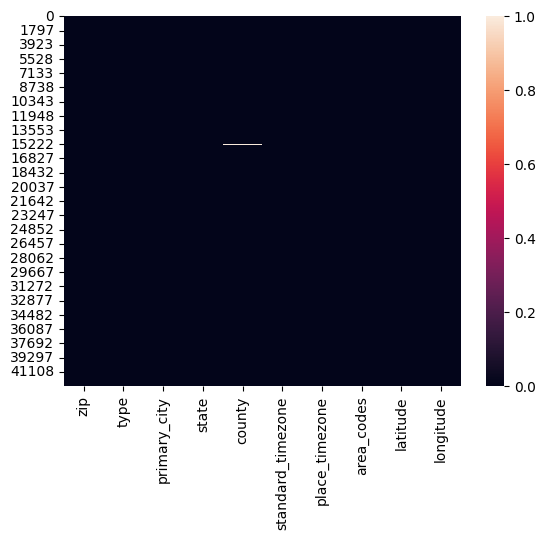

In [98]:
sns.heatmap(final_dataset.isna())